In [35]:
%pylab inline 

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import networkx as nx
import random as rd

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [36]:
def init_grid_2d_graph(m, n, k, l): 
    global g
    g = nx.grid_2d_graph(m, n) 
    init_network_state(k, l)

In [37]:
def init_network_state(k, l):
    # k - numbers of features
    # l - number of traits per feature
    global g
    # Set up default values for attributes
    for nd in g.nodes():
        #print ("nd: ", g.node[nd])
        for i in range(k):
            g.node[nd][i] = rd.randrange(0, l, 1)
            #print(g.node[nd][i])

In [38]:
def step_Axelrod(k):
    # k - numbers of features
    random_node_id = rd.choice(g.nodes())
    nbs = rd.choice(g.neighbors(random_node_id))
    same_number = 0
    diffrent_features = []
    for i in range(k):
        if g.node[random_node_id][i] == g.node[nbs][i]:
            same_number += 1
        else:
            diffrent_features.append(i)
    interaction_probability = same_number/k
    if interaction_probability > 0 and interaction_probability >= rd.random() and len(diffrent_features) > 0:
        random_feature = rd.choice(diffrent_features)
        g.node[random_node_id][random_feature] = g.node[nbs][random_feature]

In [39]:
def init_step_Axelrod(k, steps):
    step = 0
    while step < steps:
        step_Axelrod(k)
        step += 1

In [40]:
def draw_map(k):
    for u,v in g.edges():
        same_number = 0
        for i in range(k):
            if g.node[u][i] == g.node[v][i]:
                same_number += 1
        weight = same_number/k
        # '1 - weight' only used in purporse to get the drawing the same as in paper
        # Otherwise colors whould be inverted
        # Black edge - nodes has no features in common
        # White edge - nodes has completely similar cultures
        g[u][v]['weight'] = 1 - weight 
    edges,weights = zip(*nx.get_edge_attributes(g,'weight').items())
    
    pos = dict( (n, n) for n in g.nodes() )
    nx.draw(g, pos, node_color='b', edgelist=edges, edge_color=weights, width=2.0, node_size=2,
            edge_cmap=plt.cm.Greys)

### Initializing 1st grid network (10 by 10 nodes) 5 features, 10 traits 
#### Map of cultures similarities. At the beginning 

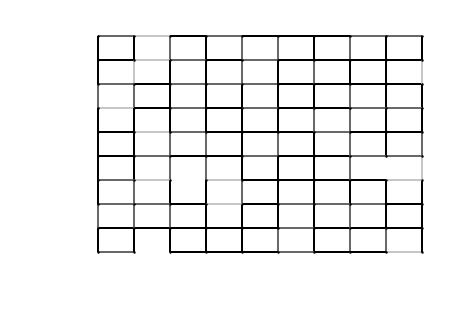

In [11]:
init_grid_2d_graph(10, 10, 5, 10)
    # 5 - numbers of features
    # 10 - number of traits per feature
draw_map(5)

#### Map of cultures similarities. After 20 000 steps 

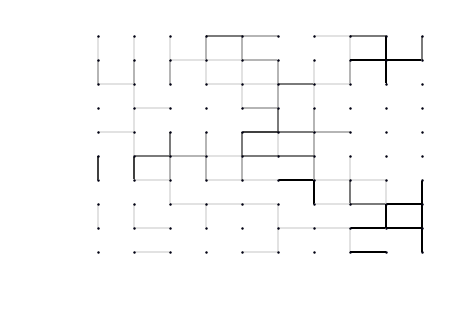

In [12]:
init_step_Axelrod(5, 20000)
draw_map(5)

#### Map of cultures similarities. After 40 000 steps 

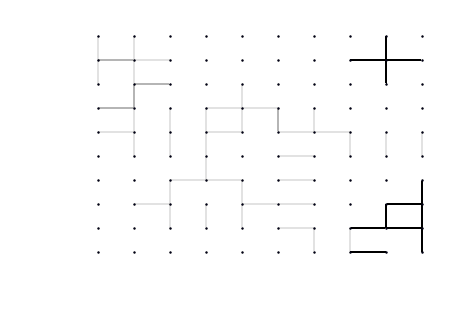

In [13]:
init_step_Axelrod(5, 20000)
draw_map(5)

#### Map of cultures similarities. After 60 000 steps 

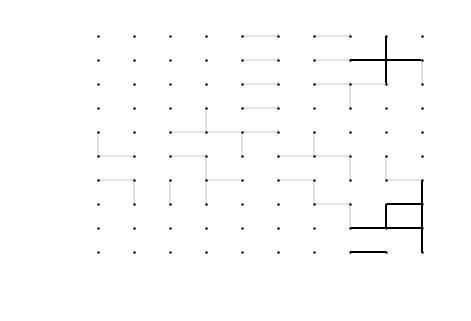

In [14]:
init_step_Axelrod(5, 20000)
draw_map(5)

### Initializing 2nd grid network (10 by 10 nodes) 25 features, 10 traits 
#### Map of cultures similarities. At the beginning 

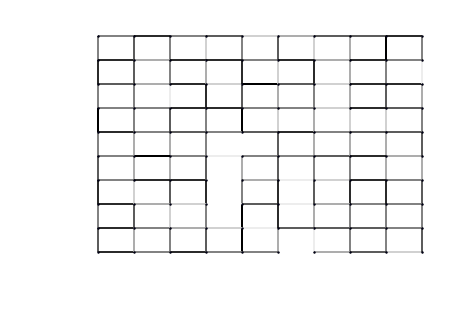

In [27]:
init_grid_2d_graph(10, 10, 25, 10)
    # 5 - numbers of features
    # 10 - number of traits per feature
draw_map(25)

#### Map of cultures similarities. After 20 000 steps 

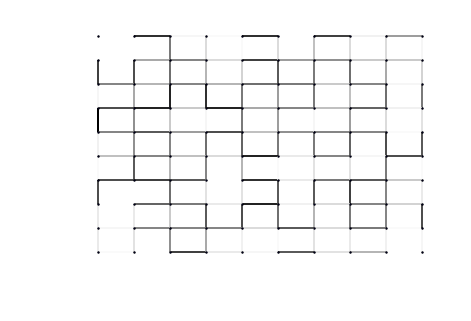

In [28]:
init_step_Axelrod(25, 20000)
draw_map(25)

#### Map of cultures similarities. After 40 000 steps (below) 

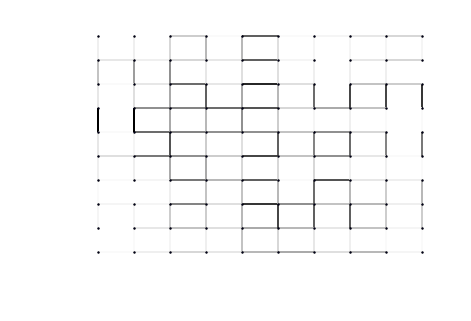

In [29]:
init_step_Axelrod(25, 20000)
draw_map(25)

#### Map of cultures similarities. After 60 000 steps (below) 

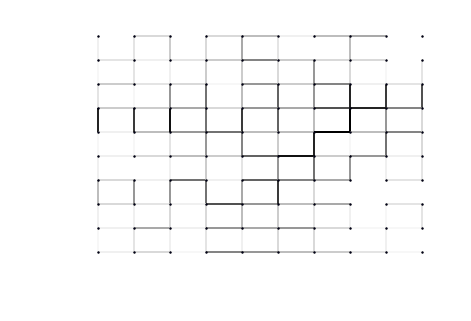

In [30]:
init_step_Axelrod(25, 20000)
draw_map(25)

### Initializing 3rd grid network (10 by 10 nodes) 5 features, 5 traits 
#### Map of cultures similarities. At the beginning 

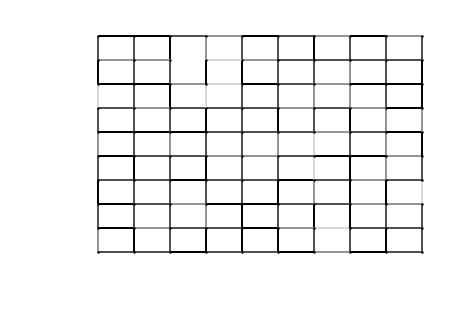

In [31]:
init_grid_2d_graph(10, 10, 5, 5)
    # 5 - numbers of features
    # 10 - number of traits per feature
draw_map(5)

#### Map of cultures similarities. After 20 000 steps (below) 

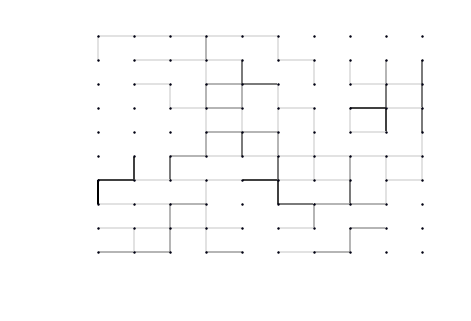

In [32]:
init_step_Axelrod(5, 20000)
draw_map(5)

#### Map of cultures similarities. After 40 000 steps (below) 

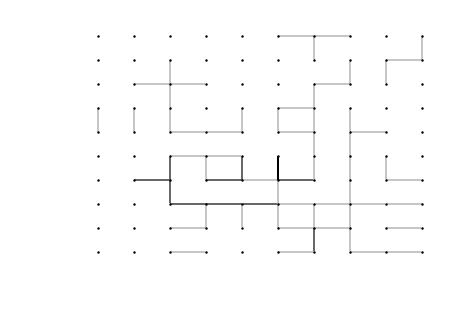

In [33]:
init_step_Axelrod(5, 20000)
draw_map(5)

#### Map of cultures similarities. After 60 000 steps (below) 

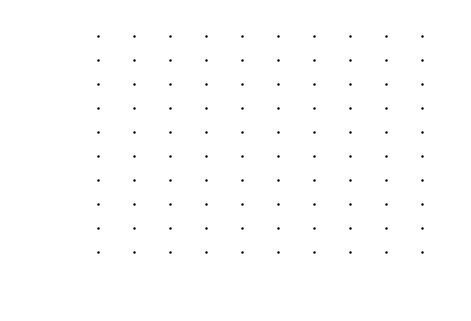

In [34]:
init_step_Axelrod(5, 20000)
draw_map(5)

## Conclusion

I was trying to test 3 cases:
 - 1 case: 5 features, 10 traits per feature 
 - 2 case: 25 features, 10 traits per feature
 - 3 case: 5 features, 5 traits per feature
 
All in all, multiple cultures converge to one or couple cultures. We can see the more amounts of features and trait the more amounts of event need to happened to converge in one culture. So the 3rd case with less features and traits per feature converges in one culture already after 60 000 event though other ones have some distinct cultures after the same amount of iterations 